In [1]:
import os
import re
from collections import defaultdict

# Get all .out files in directory
out_files = [f for f in os.listdir('.') if f.endswith('.out')]

# Dictionary to store results, with (lmax, order) tuples as keys
# and lists of (error, time) tuples as values
results = defaultdict(list)

for filename in out_files:
    try:
        with open(filename) as f:
            content = f.read()
            
            # Extract lmax and order from first line
            first_line = content.split('\n')[0]
            if 'lmax = ' not in first_line or 'order = ' not in first_line:
                print(f"Skipping {filename} - could not parse lmax/order")
                continue
                
            lmax = int(first_line.split('lmax = ')[1].split(',')[0])
            order = int(first_line.split('order = ')[1])
                
            # Look for reconstruction error in last line
            lines = content.strip().split('\n')
            last_line = lines[-1]
            second_last_line = lines[-2]
            
            if last_line.startswith('Reconstruction error: '):
                error = float(last_line.split('Reconstruction error: ')[1])
                
                # Extract average time per iteration
                time_match = re.search(r'\[.*<.*,\s*([\d.]+)s/it\]', second_last_line)
                if time_match:
                    avg_time = float(time_match.group(1))
                    # Add (error, time) tuple to list for this (lmax, order) pair
                    results[(lmax, order)].append((error, avg_time))
            
    except Exception as e:
        print(f"Error processing {filename}: {str(e)}")
        continue

# Print results
for (lmax, order), error_times in results.items():
    print(f"lmax: {lmax}, order: {order}")
    print(f"errors: {[e for e,t in error_times]}")
    print(f"times: {[t for e,t in error_times]}")
    print()


Skipping slurm-27412656.out - could not parse lmax/order
lmax: 4, order: 3
errors: [0.011090213432908058, 0.009303868748247623, 0.010057847015559673, 0.010120783932507038, 0.008951419033110142, 0.010323012247681618, 0.010495729744434357, 0.01203982625156641, 0.008751381188631058, 0.010322190821170807]
times: [26.03, 27.15, 27.23, 26.01, 27.27, 25.83, 27.52, 27.22, 27.22, 27.39]

lmax: 4, order: 2
errors: [0.008906572125852108, 0.0080862520262599, 0.009298877790570259, 0.01008736900985241, 0.012700574472546577, 0.01041931938380003, 0.00897610280662775, 0.010001643560826778, 0.008045431226491928, 0.009959788993000984]
times: [6.23, 6.07, 6.1, 6.09, 6.03, 6.12, 6.06, 5.68, 6.1, 6.11]

lmax: 4, order: 1
errors: [0.014593799598515034, 0.019127508625388145, 0.011685382574796677, 0.01650816760957241, 0.01458764262497425, 0.0269906185567379, 0.02027391642332077, 0.017097631469368935, 0.016936777159571648, 0.013137543573975563]
times: [5.97, 5.55, 5.97, 5.98, 5.91, 5.95, 5.96, 6.0, 5.97, 5.98]


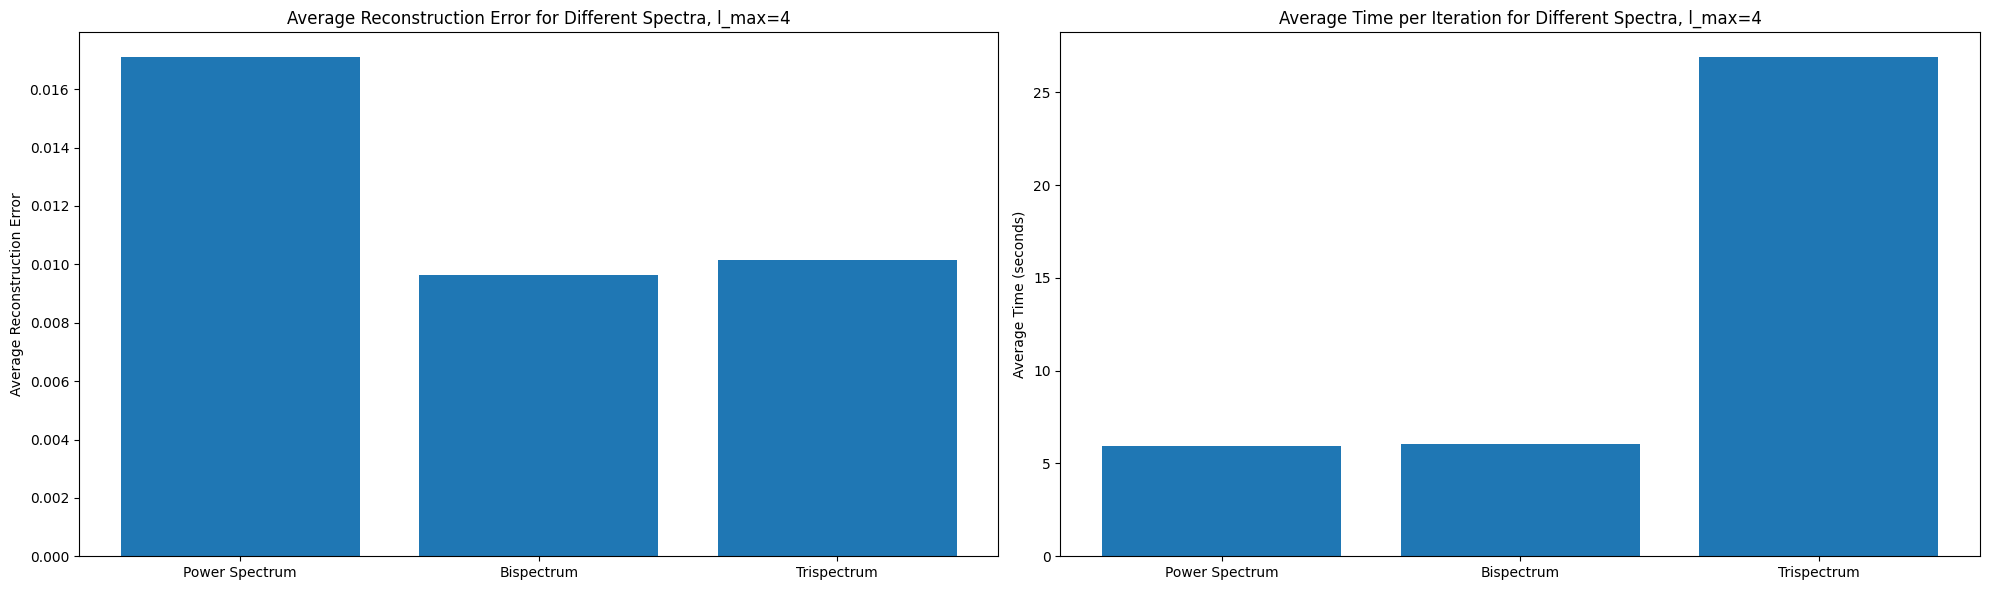

In [2]:
import matplotlib.pyplot as plt

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

l_max = 4
orders = [1, 2, 3]
spectra_labels = ['Power Spectrum', 'Bispectrum', 'Trispectrum']

# Plot reconstruction errors
errors = []
times = []
for order in orders:
    # Get list of errors and times for this l_max, order pair and take averages
    error_time_list = results.get((l_max, order), [])
    if error_time_list:
        avg_error = sum(e for e,t in error_time_list) / len(error_time_list)
        avg_time = sum(t for e,t in error_time_list) / len(error_time_list)
    else:
        avg_error = 0
        avg_time = 0
    errors.append(avg_error)
    times.append(avg_time)

x = range(len(orders))

# Plot errors
ax1.bar(x, errors)
ax1.set_title('Average Reconstruction Error for Different Spectra, l_max=4')
ax1.set_ylabel('Average Reconstruction Error')
ax1.set_xticks(x)
ax1.set_xticklabels(spectra_labels)

# Plot times
ax2.bar(x, times)
ax2.set_title('Average Time per Iteration for Different Spectra, l_max=4')
ax2.set_ylabel('Average Time (seconds)')
ax2.set_xticks(x)
ax2.set_xticklabels(spectra_labels)

plt.tight_layout()
plt.show()
